# All Features Exploration

A brief exploration of the calculated features for all nodes in the atlas. This results in 360 features of each type per subject considered. Currently includes some basic plots of some basic dimensionality reduction techniques, including PCA which was used as the data driven dimensionality reduction in the first set of models. 


In [1]:
import sys
sys.path.append('..') #workaround to deal with directory issues in notebooks

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

from src.features import load_features, binary_pca_plot


In [2]:
# import variables
data_dir='../data/'
class_labels,two_class_labels,pos_str,neg_str,clus_co,ar_array,num_regions,num_subjs=load_features(data_dir)

[[ 1.26522820e-02  5.60911942e-02  2.95530935e+00 ...  1.34775741e+01
   1.78921199e+00 -0.00000000e+00]
 [ 3.31022500e+00  1.02095408e-03 -0.00000000e+00 ...  1.19587870e-01
   1.02567841e+00  2.42703467e-01]
 [ 5.05024075e+00  1.74838418e-01  4.71522785e+00 ...  2.67670264e-01
   1.04105783e+00  6.95939164e-01]
 ...
 [ 7.99415558e+00 -0.00000000e+00  4.92503777e+00 ...  1.15570268e-01
   2.31664712e+00  3.12271941e-01]
 [ 1.47845123e+00  1.09485623e+00  1.01235316e+00 ...  4.15311719e+00
   1.78383248e+00  6.71002596e-02]
 [ 2.45877858e+00  3.04102540e-02  1.10019279e-01 ...  2.85415974e+00
   1.53421724e+00  1.80472113e-01]]


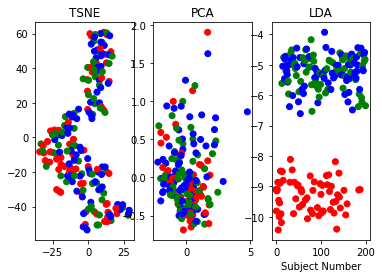

In [3]:
auto_embedded_tsne=TSNE(n_components=2,perplexity=5).fit_transform(ar_array.transpose()) #tried various perplexities (5,10,15,30,50,100) at perplexities higher than 5 the points seem linearly correlated with no class distinctions and at high perplexities (100) the points seem randomly distributed. 
auto_embedded_pca=PCA(n_components=2).fit_transform(ar_array.transpose())

LDA=LinearDiscriminantAnalysis(solver='eigen',shrinkage='auto')
auto_embedded_lda=LDA.fit_transform(ar_array.transpose(),two_class_labels) #will automatically produce one dimensional output because n_classes=2

colormap = np.array(['r', 'g','b'])
plt.subplot(1,3,1)
plt.scatter(auto_embedded_tsne[:,0],auto_embedded_tsne[:,1],c=colormap[class_labels-1])
plt.title("TSNE")
plt.subplot(1,3,2)
plt.scatter(auto_embedded_pca[:,0],auto_embedded_pca[:,1],c=colormap[class_labels-1])
plt.title("PCA")
plt.subplot(1,3,3)
plt.scatter([val for val in range(len(auto_embedded_lda))],auto_embedded_lda,c=colormap[class_labels-1])
plt.title("LDA")
plt.xlabel('Subject Number')
plt.show()

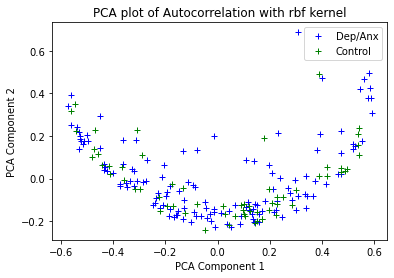

In [7]:
binary_pca_plot(ar_array,two_class_labels,'Autocorrelation',pca_kernel='rbf',pca_gamma=.1,classes={'1':'Dep/Anx','0':'Control'},save_flag=False)

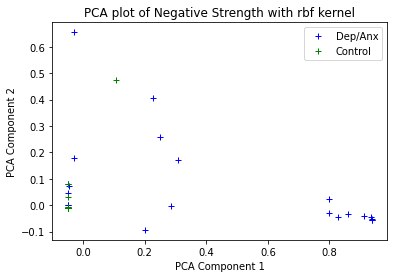

In [12]:
binary_pca_plot(neg_str,two_class_labels,'Negative Strength',pca_kernel='rbf',pca_gamma=.1,classes={'1':'Dep/Anx','0':'Control'},save_flag=False)

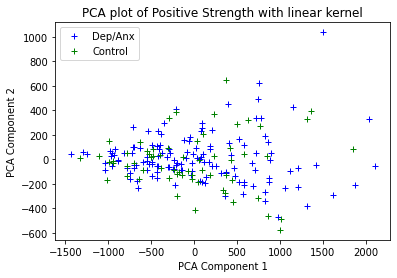

In [13]:
binary_pca_plot(pos_str,two_class_labels,'Positive Strength',pca_kernel='linear',pca_gamma=.1,classes={'1':'Dep/Anx','0':'Control'},save_flag=False)
# got errors running a "rbf" kernel on this feature, not currently worth diving in to

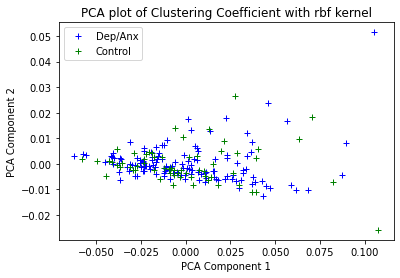

In [18]:
binary_pca_plot(clus_co,two_class_labels,'Clustering Coefficient',pca_kernel='rbf',pca_gamma=.0001,classes={'1':'Dep/Anx','0':'Control'},save_flag=False)